In [1]:
import sys
import numpy as np
sys.path.insert(0, '../src/data')
sys.path.insert(0, '../src/features')
sys.path.insert(0, '../src/models')
sys.path.insert(0, '../src/visualization')

from data_manager import DataManager
from constants import Constants

from ada_boost import AdaBoost
from decision_tree import DecisionTree
from k_means import KMeans
from svm import Svm
from neural_network import NeuralNetwork
from perceptron import Perceptron

from visualize import Visualize

## Chargement des données

In [2]:
dataManager = DataManager()

constants, x_train, x_test, t_train, t_test = dataManager.load_data()
# constants.print()
t_train_onehot = dataManager.one_hot_encoding(t_train)
t_test_onehot = dataManager.one_hot_encoding(t_test)

print(f"x_train.shape: {x_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print(f"t_train.shape: {t_train.shape}")
print(f"t_test.shape: {t_test.shape}")


x_train.shape: (792, 192)
x_test.shape: (198, 192)
t_train.shape: (792,)
t_test.shape: (198,)


## Préparation du modèle

In [3]:
constants.set_training_parameters(epochs=100, learning_rate=0.01, batch_size=100)

In [4]:
# model = AdaBoost(constants)
model = DecisionTree(constants)
# model = KMeans(constants)
# model = Svm(constants)
# model = NeuralNetwork(constants)
# model = Perceptron(constants)

In [5]:
hyperparameters = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [6]:
hyperparameters = model.find_optimal_hyperparameters(x_train, t_train, hyperparameters)

/home/okhaloui/Documents/UDS/Techniques d'apprentissage/IFT712-Project/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


## Apprentissage du modèle

In [7]:
model.train(x_train, t_train, hyperparameters)

## Tests et visualisation

In [8]:
t_pred = model.predict(x_test)

In [9]:
visualize = Visualize(constants, t_pred, t_test)

In [10]:
visualize.print_labels_scores()
# visualize.print_mean_scores()

|         Label        | Precision | Recall | F1 Score |
|----------------------|-----------|--------|----------|
| Acer_Capillipes      | 1.000     | 1.000  | 1.000    |
| Acer_Circinatum      | 1.000     | 1.000  | 1.000    |
| Acer_Mono            | 1.000     | 1.000  | 1.000    |
| Acer_Opalus          | 0.000     | 0.000  | 0.000    |
| Acer_Palmatum        | 1.000     | 1.000  | 1.000    |
| Acer_Pictum          | 1.000     | 1.000  | 1.000    |
| Acer_Platanoids      | 1.000     | 0.400  | 0.571    |
| Acer_Rubrum          | 0.000     | 0.000  | 0.000    |
| Acer_Rufinerve       | 0.000     | 0.000  | 0.000    |
| Acer_Saccharinum     | 1.000     | 0.333  | 0.500    |
| Alnus_Cordata        | 0.500     | 0.500  | 0.500    |
| Alnus_Maximowiczii   | 1.000     | 0.667  | 0.800    |
| Alnus_Rubra          | 0.500     | 0.333  | 0.400    |
| Alnus_Sieboldiana    | 0.500     | 1.000  | 0.667    |
| Alnus_Viridis        | 0.500     | 0.500  | 0.500    |
| Arundinaria_Simonii  | 1.000 

IndexError: index 93 is out of bounds for axis 0 with size 93

TypeError: unsupported operand type(s) for -: 'str' and 'int'

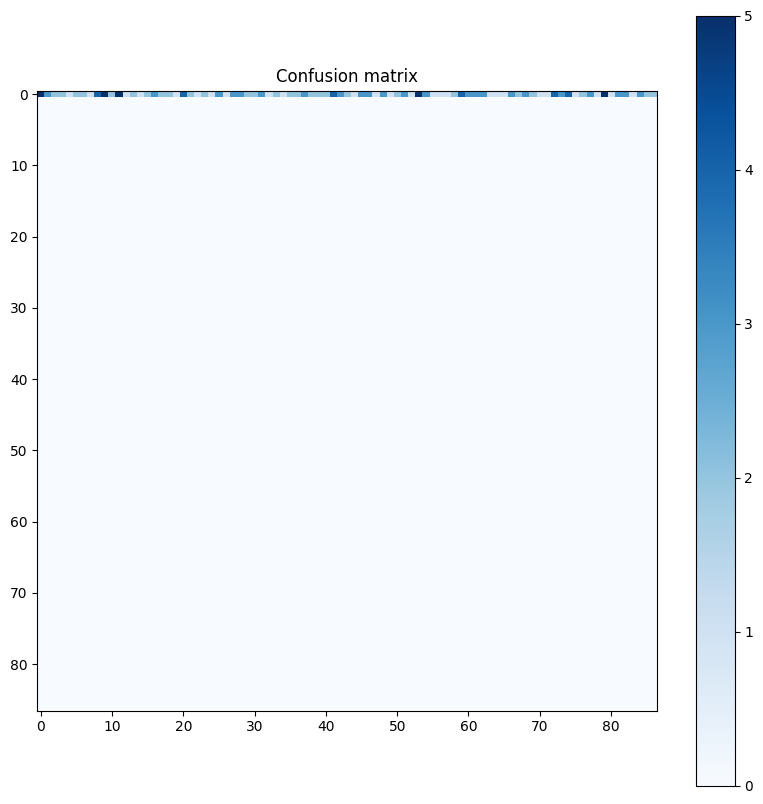

In [ ]:
visualize.plot_confusion_matrix()